## Content
Employee compensation involves all the ways your organization gives back to team members for their hard work. The obvious form of compensation is pay, whether it’s salaried, hourly, or sales-based. It’s important that how much an organization financially compensates an employee is fair, especially in terms of balancing the job role itself and the organization’s budget.

 

The salary or compensation to be paid to an employee of an organization depends on various factors like the organization group, department, job, salaries, etc. of the employee.

 

 

## Problem Statement
Imagine you are working as a data scientist in a big organization which has thousands of employees. The HR department is planning to provide some additional compensation to each working employee which needs to be calculated by looking at the profile of each employee and the benefits they are getting.

 

The HR department asks your help if you can use your data science and machine learning skills and calculate an estimated ‘Total Compensation’ for each employee.

## Objective
To build a machine learning model to estimate the total compensation to be provided to an employee.

In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
sns.set_style('darkgrid')

In [4]:
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [5]:
from jupyterthemes import jtplot
jtplot.style()

In [6]:
df = pd.read_csv('Train_set.csv')
df.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT,Total_Compensation
0,2015,4,Community Health,DPH,Public Health,250,"SEIU - Health Workers, Local 1021",Med Therapy & Auxiliary,Morgue Attendant,6725,12196,0,0.00,Calendar,16158
1,2013,4,Community Health,DPH,Public Health,39,"Stationary Engineers, Local 39",Journeyman Trade,Stationary Engineer,25058,74639,2820,12703.31,Fiscal,115784
2,2015,6,General Administration & Finance,ASR,Assessor/Recorder,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Appraisal & Taxation,Senior Real Property Appraiser,46108,100554,0,12424.50,Calendar,144708
3,2016,1,Public Protection,POL,Police,911,Police Officers' Association,Police Services,Sergeant 3,33369,140164,52754,13043.87,Fiscal,242323
4,2013,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Information Systems,IS Engineer-Journey,28684,58813,0,7655.28,Calendar,82106


In [7]:
df.groupby('OGC')

## Data Dictionary

<b>OGC</b>: Organization Group Code - Org Group is a group of Departments. For example, the Public Protection Org Group includes departments such as the Police, Fire, Adult Probation, District Attorney, and Sheriff.


<b>OG</b>: Organization Group names


<b>DC</b>: Department Code - Departments are the primary organizational unit used by the City and County of San Francisco. Examples include Recreation and Parks, Public Works, and the Police Department.


<b>Dept</b>: Department name


<b>UC</b>: Union Code - Unions represent employees in collective bargaining agreements. A job belongs to one union, although some jobs are unrepresented (usually temporarily).


<b>Union</b>: Union names


<b>JF</b>: Job Family - Job Family combines similar Jobs into meaningful groups.


<b>Job</b>: Job name


<b>EI</b>: Employee Identifier


<b>Salaries</b>: Salary of the employee


<b>Overtime</b>: Amounts paid to City employees working in excess of 40 hours per week. 


<b>H/D</b>: Health/Dental - City-paid premiums to health and dental insurance plans covering City 
employees. To protect confidentiality as legally required, pro-rated citywide averages are presented in lieu of employee-specific health and dental benefits. 


<b>YT</b>: Year Type - Fiscal (July through June) or Calendar (January through December)


<b>Total_Compensation</b>: The final compensation i.e. the sum of all salaries and benefits paid to City employees.

In [8]:

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    return summary

In [9]:
result = resumetable(df)
result

Dataset Shape: (287836, 15)


,Name,dtypes,Missing,Uniques
0,Year,int64,0,4
1,OGC,int64,0,7
2,OG,object,0,7
3,DC,object,0,54
4,Dept,object,0,54
5,UC,int64,0,789
6,Union,object,36,73
7,JF,object,38,55
8,Job,object,0,1136
9,EI,int64,0,52403


In [10]:
names={
    'Year':'Year',
    'OGC': 'Organization Group Code',
    'OG': 'Organization Group names',
    'DC': 'Department Code',
    'Dept': 'Department name',
    'UC': 'Union Code',
    'Union': 'Union names',
    'JF': 'Job Family',
    'Job': 'Job name',
    'EI': 'Employee Identifier',
    'Salaries': 'Salary of the employee',
    'Overtime':'Overtime',
    'H/D': 'Health/Dental',
    'YT': 'Year Type',
    'Total_Compensation':'Total Compensation'
}

In [11]:
column_names=df.drop('Total_Compensation',axis=1).columns
column_names

Index(['Year', 'OGC', 'OG', 'DC', 'Dept', 'UC', 'Union', 'JF', 'Job', 'EI',
       'Salaries', 'Overtime', 'H/D', 'YT'],
      dtype='object')

In [12]:
df['Year'].value_counts()

2014    86463
2013    83678
2015    79723
2016    37972
Name: Year, dtype: int64

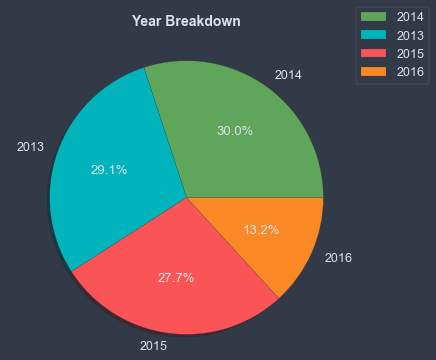

In [13]:
labels='2014','2013','2015','2016'
sizes=list(df['Year'].value_counts())
colors=['#5fa55a','#01b4bc','#fa5457', '#fa8925']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Year Breakdown',y=1.0, pad=20,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.2, 1))
plt.show()

In [14]:
df['YT'].value_counts()

Fiscal      143936
Calendar    143900
Name: YT, dtype: int64

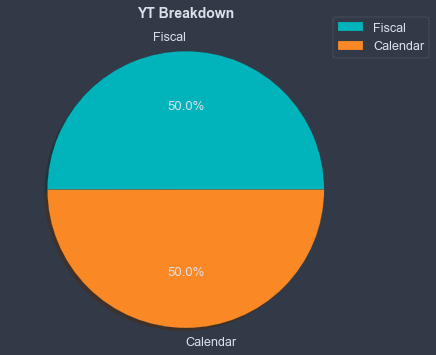

In [15]:
labels='Fiscal','Calendar'
sizes=list(df['YT'].value_counts())
colors=['#01b4bc','#fa8925']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('YT Breakdown',y=1.0, pad=20,fontsize=14,fontweight='bold')
plt.legend(loc="right", bbox_to_anchor=(1.2, 1))
plt.show()

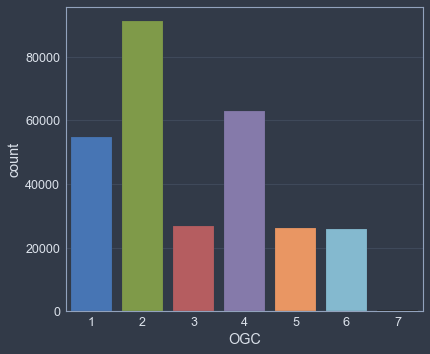

In [16]:
sns.countplot(x='OGC', data=df)

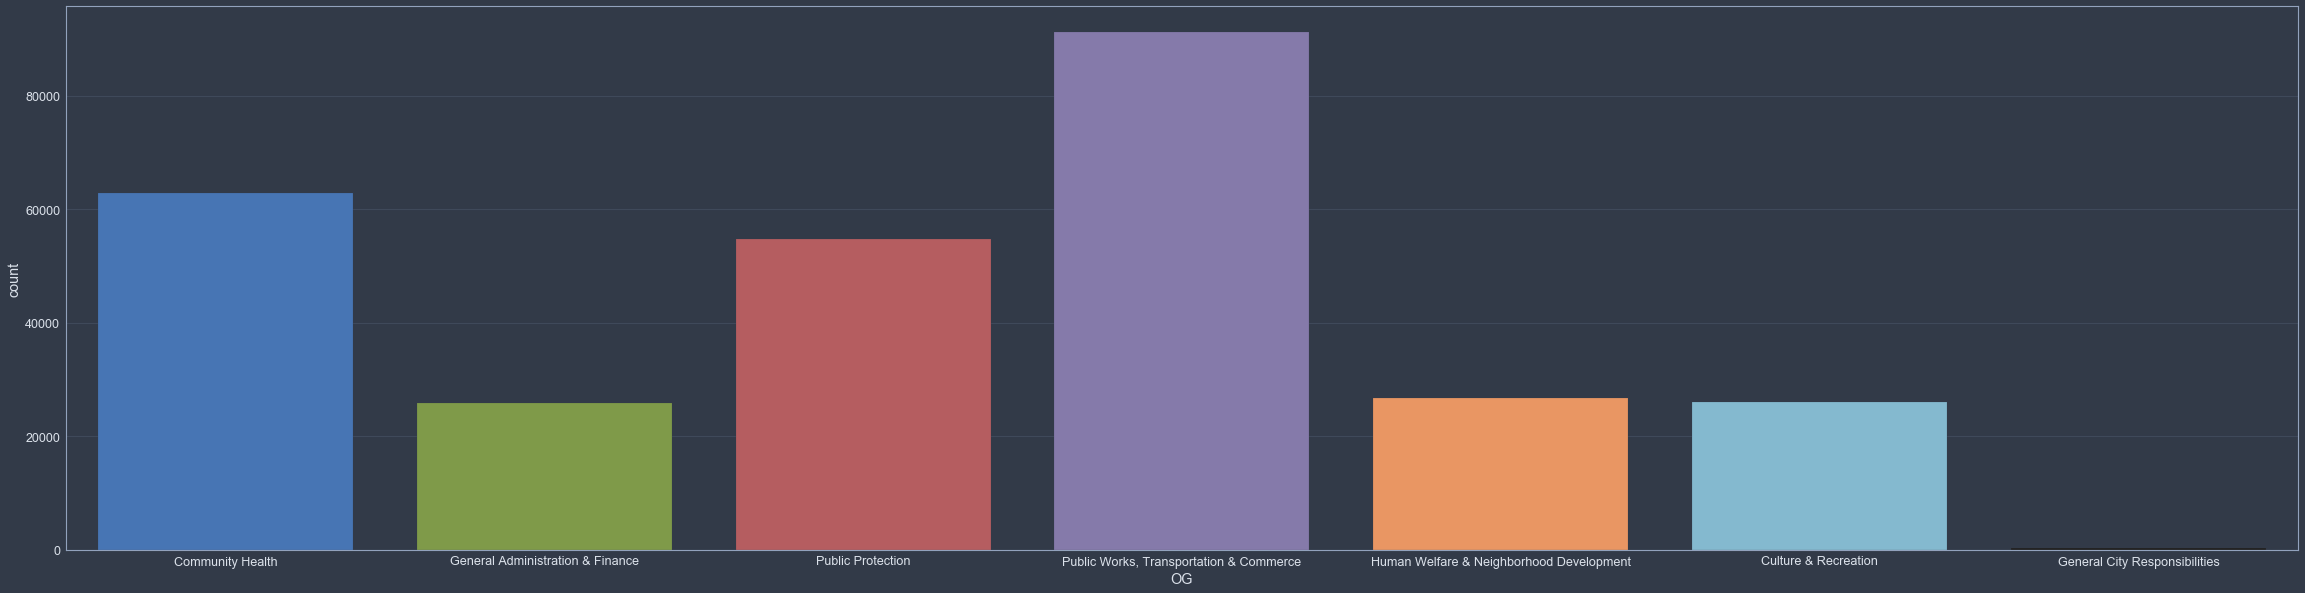

In [17]:
fig, ax = plt.subplots(figsize=(40,10))
sns.countplot(x='OG', data=df,ax=ax)

In [18]:
df['DC'].value_counts()

DPH    62834
MTA    42171
DSS    23839
POL    22896
REC    15972
AIR    13511
FIR    11584
DPW    10977
SHF     7395
ADM     7364
PUC     6749
LIB     6598
WTR     5785
CWP     4112
CRT     3958
HHP     2897
JUV     2363
CAT     2339
DBI     2225
DAT     2141
HRD     2041
ECD     2036
CON     2034
TIS     1990
FAM     1945
PRT     1931
TTX     1893
CPC     1885
REG     1834
ASR     1293
PDR     1218
ADP     1175
ENV      997
BOS      872
MYR      842
ECN      822
RET      746
CSS      676
WAR      610
HSS      566
AAM      553
CHF      461
RNT      316
UNA      294
ART      291
HRC      174
ETH      122
CFC      110
WOM      104
SCI       98
PAB       81
CSC       77
CII       25
LLB       14
Name: DC, dtype: int64

In [19]:
df['Dept'].value_counts()

Public Health                             62859
Municipal Transportation Agency           42149
Human Services                            23847
Police                                    22911
Recreation and Park Commission            15968
Airport Commission                        13507
Fire Department                           11564
General Services Agency - Public Works    10958
Sheriff                                    7410
General Services Agency - City Admin       7343
PUC Public Utilities Commission            6758
Public Library                             6597
PUC Water Department                       5813
PUC Wastewater Enterprise                  4114
Superior Court                             3959
PUC Hetch Hetchy                           2894
Juvenile Probation                         2356
City Attorney                              2336
Department of Building Inspection          2218
District Attorney                          2133
Human Resources                         

In [20]:
df['UC'].value_counts()

790    80916
21     35836
791    21699
911    19092
253    17770
       ...  
371        1
372        1
629        1
630        1
879        1
Name: UC, Length: 789, dtype: int64

In [21]:
df['Union'].value_counts()

SEIU - Miscellaneous, Local 1021                      81349
Prof & Tech Engineers - Miscellaneous, Local 21       36130
SEIU - Staff and Per Diem Nurses, Local 1021          21861
Police Officers' Association                          19177
Transport Workers - Transit Operators, Local 250-A    17804
                                                      ...  
Municipal Executive Association - Police                  9
Management Unrepresented Employees - MTA                  7
Port Director                                             6
Municipal Exec Assoc-Misc                                 2
POA                                                       2
Name: Union, Length: 73, dtype: int64

In [22]:
df['JF'].value_counts()

Nursing                           30047
Street Transit                    23667
Police Services                   19170
Journeyman Trade                  17052
Public Service Aide               15528
Human Services                    14869
Clerical, Secretarial & Steno     13349
Fire Services                     11045
Housekeeping & Laundry             9370
Management                         9347
Professional Engineering           8503
Recreation                         8167
Protection & Apprehension          8070
Correction & Detention             7751
Budget, Admn & Stats Analysis      7628
Information Systems                6423
Legal & Court                      6414
Payroll, Billing & Accounting      6032
Med Therapy & Auxiliary            5777
Library                            5380
Lab, Pharmacy & Med Techs          4841
SF Superior Court                  4088
Personnel                          4066
Sub-Professional Engineering       3921
Semi-Skilled & General Labor       3848


In [23]:
df['Job'].value_counts()

Transit Operator                  17830
Special Nurse                     10445
Registered Nurse                   9062
Public Svc Aide-Public Works       6371
Police Officer 3                   5902
                                  ...  
Pianist                               1
Mobile Equipment Supervisor           1
Operating Room Nurse                  1
Musm Exhibit Packer & Repairer        1
Asst Harbormaster (OCII)              1
Name: Job, Length: 1136, dtype: int64

In [24]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)
numerical_cols

['Year',
 'OGC',
 'UC',
 'EI',
 'Salaries',
 'Overtime',
 'H/D',
 'Total_Compensation']

In [25]:
numerical_cols=['EI','Salaries','Overtime','H/D','Total_Compensation']

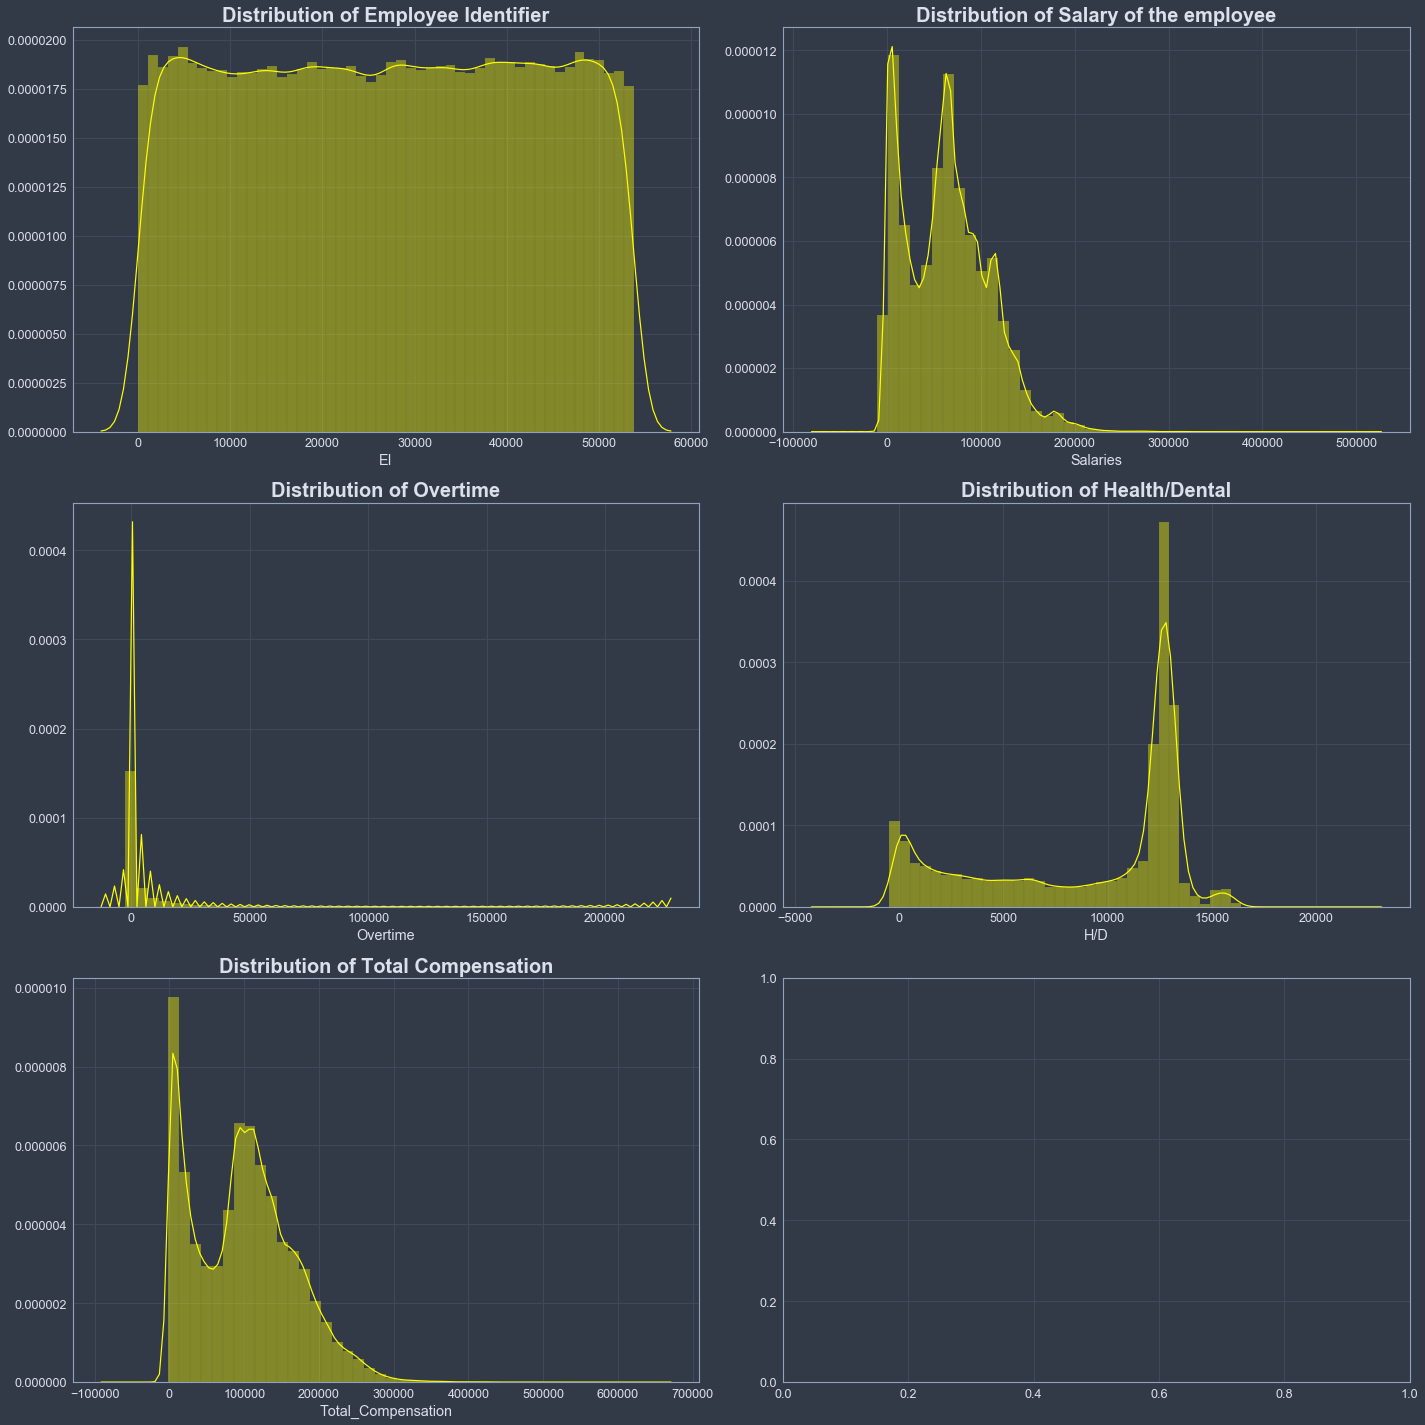

In [26]:
i=0
f, axs = plt.subplots(3,2,figsize=(20,20))
for column_name in numerical_cols:
    # Set up the plot
    ax = plt.subplot(3, 2, i + 1)
    
    # Draw the plot
    sns.distplot(df[column_name],color = 'yellow')
    
    # Title and labels
    ax.set_title('Distribution of %s' % names[column_name],size=20,fontweight='bold')
    i=i+1
    

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Total Compensation')

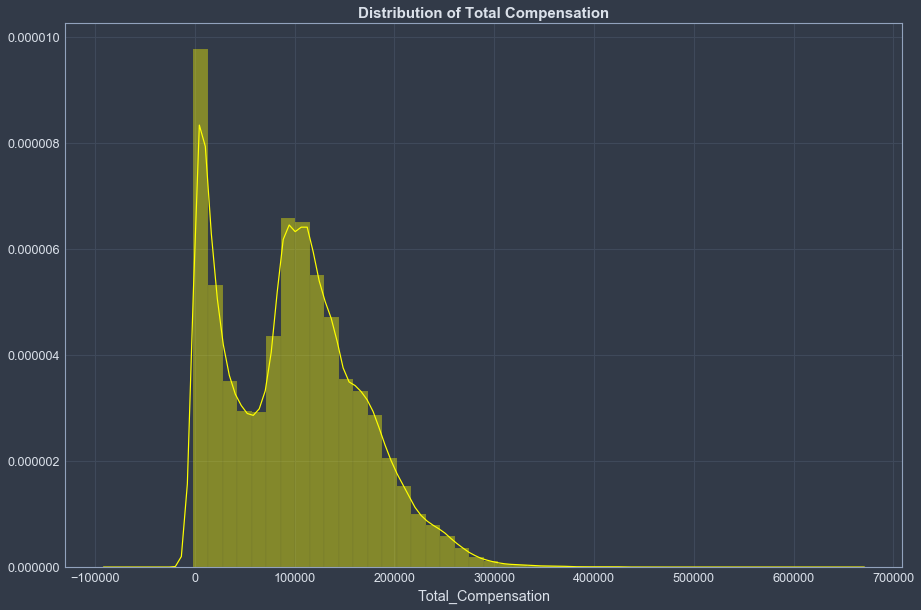

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(df[column_name],color = 'yellow')
plt.title('Distribution of %s' % names[column_name],size=15,fontweight='bold')

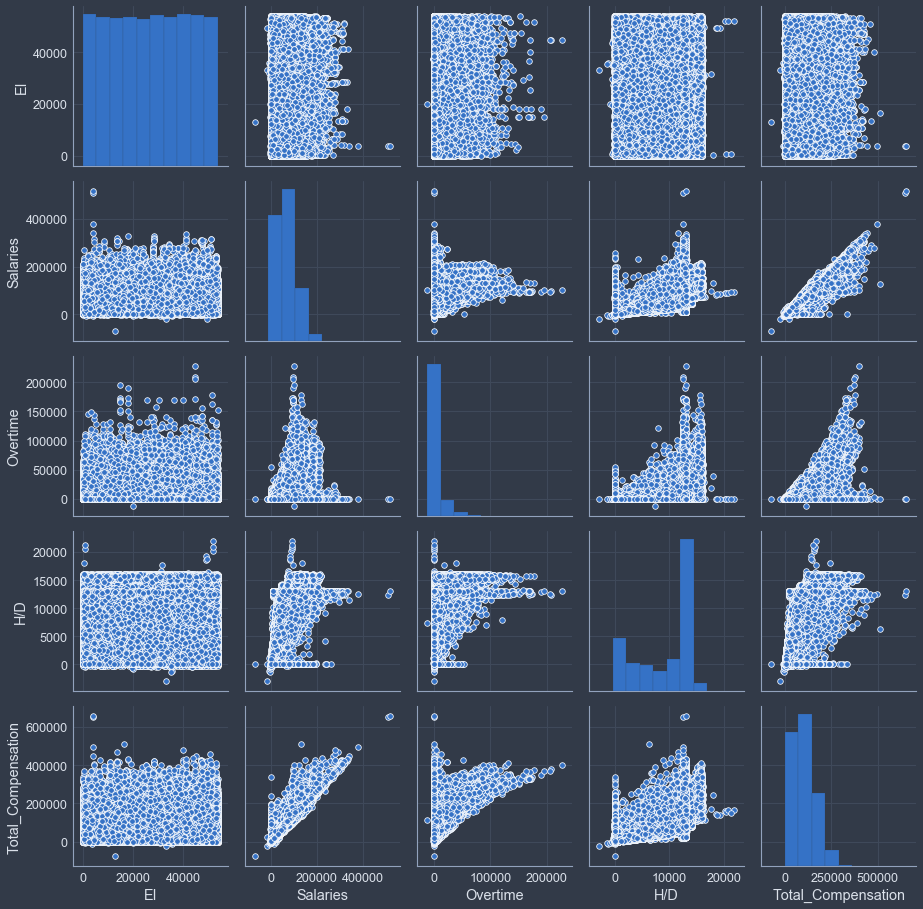

In [28]:
sns.pairplot(df[numerical_cols])

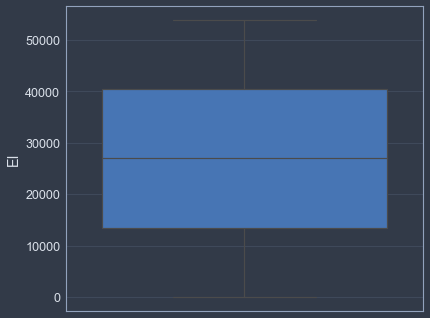

In [29]:
sns.boxplot(data=df,y='EI')

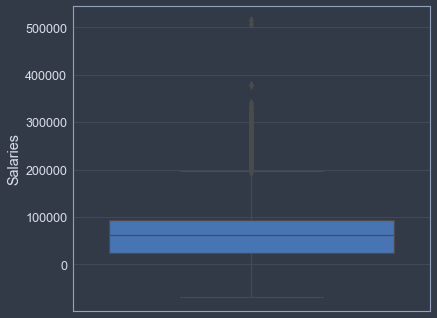

In [30]:
sns.boxplot(data=df,y=numerical_cols[1])

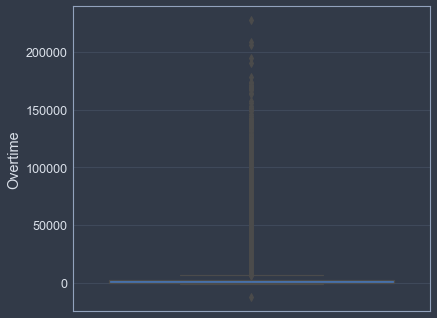

In [31]:
sns.boxplot(data=df,y=numerical_cols[2])

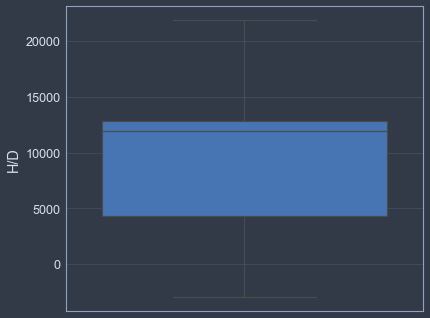

In [32]:
sns.boxplot(data=df,y=numerical_cols[3])

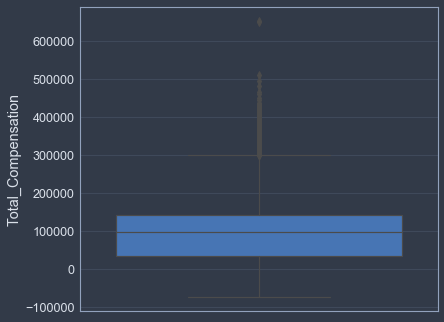

In [33]:
sns.boxplot(data=df,y=numerical_cols[4])

In [34]:
df[numerical_cols].corr()

,EI,Salaries,Overtime,H/D,Total_Compensation
EI,1.000000,-0.004385,-0.001167,-0.003472,-0.003966
Salaries,-0.004385,1.000000,0.271575,0.774898,0.972585
Overtime,-0.001167,0.271575,1.000000,0.312468,0.453497
H/D,-0.003472,0.774898,0.312468,1.000000,0.806283
Total_Compensation,-0.003966,0.972585,0.453497,0.806283,1.000000


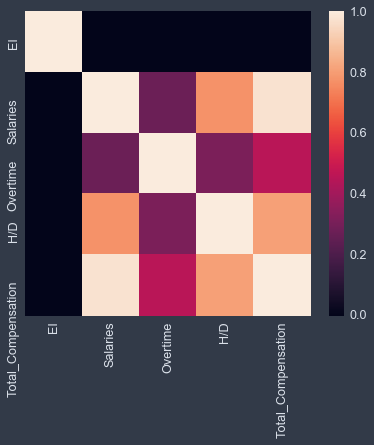

In [35]:
sns.heatmap(df[numerical_cols].corr())

In [36]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

Text(0.5, 1.0, 'Boxplot of Employee Identifier before removal of outliers')

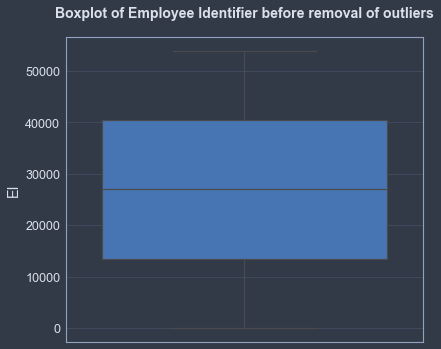

In [37]:
sns.boxplot(y=numerical_cols[0],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[numerical_cols[0]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Salary of the employee before removal of outliers')

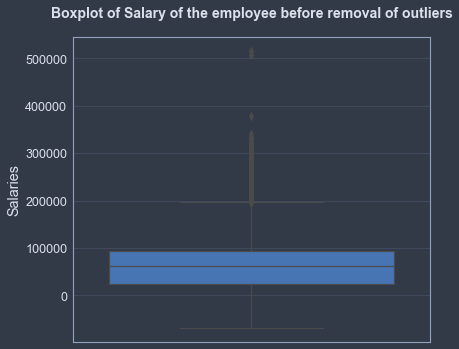

In [38]:
sns.boxplot(y=numerical_cols[1],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[numerical_cols[1]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Salary of the employee after removal of outliers')

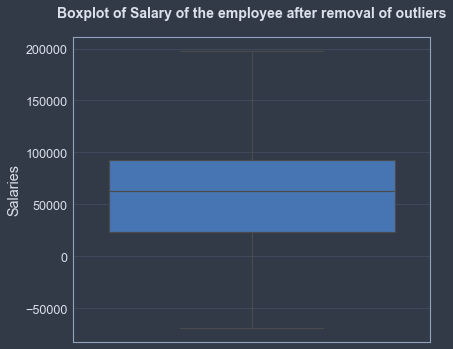

In [39]:
lower,upper=remove_outliers(df[numerical_cols[1]])
df[numerical_cols[1]]=np.where(df[numerical_cols[1]]>upper,upper,df[numerical_cols[1]])
df[numerical_cols[1]]=np.where(df[numerical_cols[1]]<lower,lower,df[numerical_cols[1]])
sns.boxplot(y=numerical_cols[1],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[numerical_cols[1]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Overtime before removal of outliers')

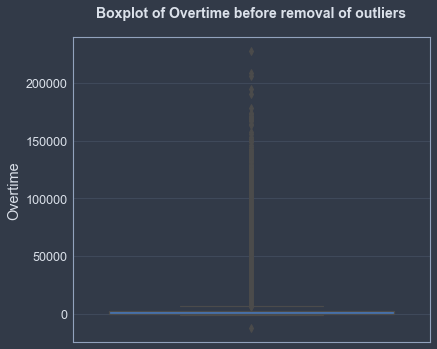

In [40]:
sns.boxplot(y=numerical_cols[2],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[numerical_cols[2]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Overtime after removal of outliers')

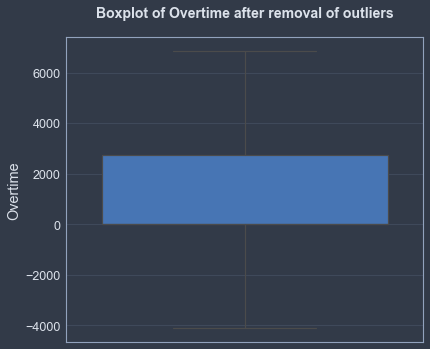

In [41]:
lower,upper=remove_outliers(df[numerical_cols[2]])
df[numerical_cols[2]]=np.where(df[numerical_cols[2]]>upper,upper,df[numerical_cols[2]])
df[numerical_cols[2]]=np.where(df[numerical_cols[2]]<lower,lower,df[numerical_cols[2]])
sns.boxplot(y=numerical_cols[2],data=df)
plt.title('Boxplot of %s after removal of outliers'%names[numerical_cols[2]],y=1.0, pad=20,fontsize=14,fontweight='bold')

Text(0.5, 1.0, 'Boxplot of Health/Dental before removal of outliers')

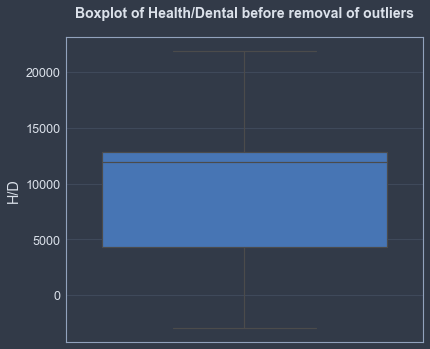

In [42]:
sns.boxplot(y=numerical_cols[3],data=df)
plt.title('Boxplot of %s before removal of outliers'%names[numerical_cols[3]],y=1.0, pad=20,fontsize=14,fontweight='bold')

In [43]:
df['Union'] = df['Union'].fillna('None')
df['JF'] = df['JF'].fillna('None')

In [44]:
cat_cols=['DC','Dept','Union','JF','Job']
cat_cols

['DC', 'Dept', 'Union', 'JF', 'Job']

In [45]:
df.DC.value_counts().sort_values(ascending=False)

DPH    62834
MTA    42171
DSS    23839
POL    22896
REC    15972
AIR    13511
FIR    11584
DPW    10977
SHF     7395
ADM     7364
PUC     6749
LIB     6598
WTR     5785
CWP     4112
CRT     3958
HHP     2897
JUV     2363
CAT     2339
DBI     2225
DAT     2141
HRD     2041
ECD     2036
CON     2034
TIS     1990
FAM     1945
PRT     1931
TTX     1893
CPC     1885
REG     1834
ASR     1293
PDR     1218
ADP     1175
ENV      997
BOS      872
MYR      842
ECN      822
RET      746
CSS      676
WAR      610
HSS      566
AAM      553
CHF      461
RNT      316
UNA      294
ART      291
HRC      174
ETH      122
CFC      110
WOM      104
SCI       98
PAB       81
CSC       77
CII       25
LLB       14
Name: DC, dtype: int64

In [46]:
df1=df.copy()
top_10=[x for x in df.DC.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    df1[label]=np.where(df1['DC']==label,1,0)
    
df1[['DC']+top_10].head(10)

,DC,DPH,MTA,DSS,POL,REC,AIR,FIR,DPW,SHF,ADM
0,DPH,1,0,0,0,0,0,0,0,0,0
1,DPH,1,0,0,0,0,0,0,0,0,0
2,ASR,0,0,0,0,0,0,0,0,0,0
3,POL,0,0,0,1,0,0,0,0,0,0
4,HHP,0,0,0,0,0,0,0,0,0,0
5,TTX,0,0,0,0,0,0,0,0,0,0
6,DSS,0,0,1,0,0,0,0,0,0,0
7,MTA,0,1,0,0,0,0,0,0,0,0
8,REC,0,0,0,0,1,0,0,0,0,0
9,POL,0,0,0,1,0,0,0,0,0,0


In [47]:
top_10=[x for x in df.Dept.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    df1[label]=np.where(df1['Dept']==label,1,0)
    
df1[['Dept']+top_10].head(10)

,Dept,Public Health,Municipal Transportation Agency,Human Services,Police,Recreation and Park Commission,Airport Commission,Fire Department,General Services Agency - Public Works,Sheriff,General Services Agency - City Admin
0,Public Health,1,0,0,0,0,0,0,0,0,0
1,Public Health,1,0,0,0,0,0,0,0,0,0
2,Assessor/Recorder,0,0,0,0,0,0,0,0,0,0
3,Police,0,0,0,1,0,0,0,0,0,0
4,PUC Hetch Hetchy,0,0,0,0,0,0,0,0,0,0
5,Treasurer/Tax Collector,0,0,0,0,0,0,0,0,0,0
6,Human Services,0,0,1,0,0,0,0,0,0,0
7,Municipal Transportation Agency,0,1,0,0,0,0,0,0,0,0
8,Recreation and Park Commission,0,0,0,0,1,0,0,0,0,0
9,Police,0,0,0,1,0,0,0,0,0,0


In [48]:
top_10=[x for x in df.Union.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    df1[label]=np.where(df1['Union']==label,1,0)
    
df1[['Union']+top_10].head(10)

,Union,"SEIU - Miscellaneous, Local 1021","Prof & Tech Engineers - Miscellaneous, Local 21","SEIU - Staff and Per Diem Nurses, Local 1021",Police Officers' Association,"Transport Workers - Transit Operators, Local 250-A","SEIU - Health Workers, Local 1021","SEIU - Human Services, Local 1021","Firefighters - Miscellaneous, Local 798",Municipal Executive Association - Miscellaneous,"Laborers, Local 261"
0,"SEIU - Health Workers, Local 1021",0,0,0,0,0,1,0,0,0,0
1,"Stationary Engineers, Local 39",0,0,0,0,0,0,0,0,0,0
2,"Prof & Tech Engineers - Miscellaneous, Local 21",0,1,0,0,0,0,0,0,0,0
3,Police Officers' Association,0,0,0,1,0,0,0,0,0,0
4,"Prof & Tech Engineers - Miscellaneous, Local 21",0,1,0,0,0,0,0,0,0,0
5,"SEIU - Miscellaneous, Local 1021",1,0,0,0,0,0,0,0,0,0
6,"SEIU - Human Services, Local 1021",0,0,0,0,0,0,1,0,0,0
7,"Automotive Machinists, Local 1414",0,0,0,0,0,0,0,0,0,0
8,"SEIU - Miscellaneous, Local 1021",1,0,0,0,0,0,0,0,0,0
9,Police Officers' Association,0,0,0,1,0,0,0,0,0,0


In [49]:
top_10=[x for x in df.JF.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    df1[label]=np.where(df1['JF']==label,1,0)
    
df1[['JF']+top_10].head(10)

,JF,Nursing,Street Transit,Police Services,Journeyman Trade,Public Service Aide,Human Services,"Clerical, Secretarial & Steno",Fire Services,Housekeeping & Laundry,Management
0,Med Therapy & Auxiliary,0,0,0,0,0,0,0,0,0,0
1,Journeyman Trade,0,0,0,1,0,0,0,0,0,0
2,Appraisal & Taxation,0,0,0,0,0,0,0,0,0,0
3,Police Services,0,0,1,0,0,0,0,0,0,0
4,Information Systems,0,0,0,0,0,0,0,0,0,0
5,Revenue,0,0,0,0,0,0,0,0,0,0
6,Community Development,0,0,0,0,0,0,0,0,0,0
7,Journeyman Trade,0,0,0,1,0,0,0,0,0,0
8,Recreation,0,0,0,0,0,0,0,0,0,0
9,Police Services,0,0,1,0,0,0,0,0,0,0


In [50]:
top_10=[x for x in df.Job.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    df1[label]=np.where(df1['Job']==label,1,0)
    
df1[['Job']+top_10].head(10)

,Job,Transit Operator,Special Nurse,Registered Nurse,Public Svc Aide-Public Works,Police Officer 3,Firefighter,Custodian,Public Service Trainee,Recreation Leader,Police Officer
0,Morgue Attendant,0,0,0,0,0,0,0,0,0,0
1,Stationary Engineer,0,0,0,0,0,0,0,0,0,0
2,Senior Real Property Appraiser,0,0,0,0,0,0,0,0,0,0
3,Sergeant 3,0,0,0,0,0,0,0,0,0,0
4,IS Engineer-Journey,0,0,0,0,0,0,0,0,0,0
5,Senior Collections Officer,0,0,0,0,0,0,0,0,0,0
6,Employment & Training Spec 3,0,0,0,0,0,0,0,0,0,0
7,Automotive Mechanic,0,0,0,0,0,0,0,0,0,0
8,Recreation Leader,0,0,0,0,0,0,0,0,1,0
9,Police Officer,0,0,0,0,0,0,0,0,0,1


In [51]:
df1=df1.drop(cat_cols,axis=1)
df1

,Year,OGC,OG,UC,EI,Salaries,Overtime,H/D,YT,Total_Compensation,...,Transit Operator,Special Nurse,Registered Nurse,Public Svc Aide-Public Works,Police Officer 3,Firefighter,Custodian,Public Service Trainee,Recreation Leader,Police Officer
0,2015,4,Community Health,250,6725,12196.0,0.0,0.00,Calendar,16158,...,0,0,0,0,0,0,0,0,0,0
1,2013,4,Community Health,39,25058,74639.0,2820.0,12703.31,Fiscal,115784,...,0,0,0,0,0,0,0,0,0,0
2,2015,6,General Administration & Finance,21,46108,100554.0,0.0,12424.50,Calendar,144708,...,0,0,0,0,0,0,0,0,0,0
3,2016,1,Public Protection,911,33369,140164.0,6845.0,13043.87,Fiscal,242323,...,0,0,0,0,0,0,0,0,0,0
4,2013,2,"Public Works, Transportation & Commerce",21,28684,58813.0,0.0,7655.28,Calendar,82106,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287831,2016,3,Human Welfare & Neighborhood Development,535,9610,78980.0,6845.0,13068.80,Fiscal,147079,...,0,0,0,0,0,0,0,0,0,0
287832,2015,5,Culture & Recreation,790,790,30704.0,0.0,5465.57,Calendar,40174,...,0,0,0,0,0,0,0,0,0,0
287833,2014,2,"Public Works, Transportation & Commerce",6,38352,104451.0,0.0,13054.94,Calendar,164669,...,0,0,0,0,0,0,0,0,0,0
287834,2013,1,Public Protection,250,29266,14425.0,0.0,4051.90,Calendar,19594,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df1=pd.get_dummies(df1, drop_first=True)
df1.head()

,Year,OGC,UC,EI,Salaries,Overtime,H/D,Total_Compensation,DPH,MTA,...,Public Service Trainee,Recreation Leader,Police Officer,OG_Culture & Recreation,OG_General Administration & Finance,OG_General City Responsibilities,OG_Human Welfare & Neighborhood Development,OG_Public Protection,"OG_Public Works, Transportation & Commerce",YT_Fiscal
0,2015,4,250,6725,12196.0,0.0,0.00,16158,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2013,4,39,25058,74639.0,2820.0,12703.31,115784,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2015,6,21,46108,100554.0,0.0,12424.50,144708,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2016,1,911,33369,140164.0,6845.0,13043.87,242323,0,0,...,0,0,0,0,0,0,0,1,0,1
4,2013,2,21,28684,58813.0,0.0,7655.28,82106,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [54]:
from sklearn.model_selection import train_test_split
X=df1.drop('Total_Compensation',axis=1)
y=df1['Total_Compensation']
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 2)

In [55]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_train_norm=pd.DataFrame(X_train_norm, columns = df1.drop('Total_Compensation',axis=1).columns)
X_test_norm = norm.transform(X_test)
X_test_norm=pd.DataFrame(X_test_norm, columns = df1.drop('Total_Compensation',axis=1).columns)

In [56]:
X_train_norm.columns

Index(['Year', 'OGC', 'UC', 'EI', 'Salaries', 'Overtime', 'H/D', 'DPH', 'MTA',
       'DSS', 'POL', 'REC', 'AIR', 'FIR', 'DPW', 'SHF', 'ADM', 'Public Health',
       'Municipal Transportation Agency', 'Human Services', 'Police',
       'Recreation and Park Commission', 'Airport Commission',
       'Fire Department', 'General Services Agency - Public Works', 'Sheriff',
       'General Services Agency - City Admin',
       'SEIU - Miscellaneous, Local 1021',
       'Prof & Tech Engineers - Miscellaneous, Local 21',
       'SEIU - Staff and Per Diem Nurses, Local 1021',
       'Police Officers' Association',
       'Transport Workers - Transit Operators, Local 250-A',
       'SEIU - Health Workers, Local 1021',
       'SEIU - Human Services, Local 1021',
       'Firefighters - Miscellaneous, Local 798',
       'Municipal Executive Association - Miscellaneous',
       'Laborers, Local 261', 'Nursing', 'Street Transit', 'Police Services',
       'Journeyman Trade', 'Public Service Aide',
  

In [57]:
from sklearn.metrics import mean_squared_error
reg=LinearRegression()
reg.fit(X_train_norm,y_train)
y_pred=reg.predict(X_test_norm)
mean_squared_error(y_test,y_pred,squared=False)

11015.179135241227

In [58]:
test_set=pd.read_csv(r"test_set.csv")
test_set.head()

,Year,OGC,OG,DC,Dept,UC,Union,JF,Job,EI,Salaries,Overtime,H/D,YT
0,2016,2,"Public Works, Transportation & Commerce",AIR,Airport Commission,790,"SEIU - Miscellaneous, Local 1021","Budget, Admn & Stats Analysis",Management Assistant,6161,74526,0,13068.800000,Fiscal
1,2013,3,Human Welfare & Neighborhood Development,DSS,Human Services,1,Miscellaneous Unrepresented Employees,Public Service Aide,Public Svc Aide-Public Works,17890,7219,0,3328.053046,Calendar
2,2016,2,"Public Works, Transportation & Commerce",PUC,PUC Public Utilities Commission,21,"Prof & Tech Engineers - Miscellaneous, Local 21",Sub-Professional Engineering,"Stdntdsgntrain1, Arch/Eng/Plng",15092,4616,0,1147.260000,Fiscal
3,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",Human Services,Eligibility Worker,5144,6345,0,1433.600000,Calendar
4,2015,2,"Public Works, Transportation & Commerce",HHP,PUC Hetch Hetchy,6,"Electrical Workers, Local 6",Journeyman Trade,Trans And Dist Line Worker,40128,105851,153,12242.440000,Calendar


In [59]:
top_10=[x for x in df.DC.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    test_set[label]=np.where(test_set['DC']==label,1,0)
    
test_set[['DC']+top_10].head(10)

,DC,DPH,MTA,DSS,POL,REC,AIR,FIR,DPW,SHF,ADM
0,AIR,0,0,0,0,0,1,0,0,0,0
1,DSS,0,0,1,0,0,0,0,0,0,0
2,PUC,0,0,0,0,0,0,0,0,0,0
3,DSS,0,0,1,0,0,0,0,0,0,0
4,HHP,0,0,0,0,0,0,0,0,0,0
5,MTA,0,1,0,0,0,0,0,0,0,0
6,PDR,0,0,0,0,0,0,0,0,0,0
7,DPH,1,0,0,0,0,0,0,0,0,0
8,JUV,0,0,0,0,0,0,0,0,0,0
9,FIR,0,0,0,0,0,0,1,0,0,0


In [60]:
top_10=[x for x in df.Dept.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    test_set[label]=np.where(test_set['Dept']==label,1,0)
    
test_set[['Dept']+top_10].head(10)

,Dept,Public Health,Municipal Transportation Agency,Human Services,Police,Recreation and Park Commission,Airport Commission,Fire Department,General Services Agency - Public Works,Sheriff,General Services Agency - City Admin
0,Airport Commission,0,0,0,0,0,1,0,0,0,0
1,Human Services,0,0,1,0,0,0,0,0,0,0
2,PUC Public Utilities Commission,0,0,0,0,0,0,0,0,0,0
3,Human Services,0,0,1,0,0,0,0,0,0,0
4,PUC Hetch Hetchy,0,0,0,0,0,0,0,0,0,0
5,Municipal Transportation Agency,0,1,0,0,0,0,0,0,0,0
6,Public Defender,0,0,0,0,0,0,0,0,0,0
7,Public Health,1,0,0,0,0,0,0,0,0,0
8,Juvenile Probation,0,0,0,0,0,0,0,0,0,0
9,Fire Department,0,0,0,0,0,0,1,0,0,0


In [61]:
top_10=[x for x in df.Union.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    test_set[label]=np.where(test_set['Union']==label,1,0)
    
test_set[['Union']+top_10].head(10)

,Union,"SEIU - Miscellaneous, Local 1021","Prof & Tech Engineers - Miscellaneous, Local 21","SEIU - Staff and Per Diem Nurses, Local 1021",Police Officers' Association,"Transport Workers - Transit Operators, Local 250-A","SEIU - Health Workers, Local 1021","SEIU - Human Services, Local 1021","Firefighters - Miscellaneous, Local 798",Municipal Executive Association - Miscellaneous,"Laborers, Local 261"
0,"SEIU - Miscellaneous, Local 1021",1,0,0,0,0,0,0,0,0,0
1,Miscellaneous Unrepresented Employees,0,0,0,0,0,0,0,0,0,0
2,"Prof & Tech Engineers - Miscellaneous, Local 21",0,1,0,0,0,0,0,0,0,0
3,"SEIU - Human Services, Local 1021",0,0,0,0,0,0,1,0,0,0
4,"Electrical Workers, Local 6",0,0,0,0,0,0,0,0,0,0
5,"Electrical Workers, Local 6",0,0,0,0,0,0,0,0,0,0
6,"SEIU - Miscellaneous, Local 1021",1,0,0,0,0,0,0,0,0,0
7,"Prof & Tech Engineers - Miscellaneous, Local 21",0,1,0,0,0,0,0,0,0,0
8,"SEIU - Miscellaneous, Local 1021",1,0,0,0,0,0,0,0,0,0
9,"Firefighters - Miscellaneous, Local 798",0,0,0,0,0,0,0,1,0,0


In [62]:
top_10=[x for x in df.JF.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    test_set[label]=np.where(test_set['JF']==label,1,0)
    
test_set[['JF']+top_10].head(10)

,JF,Nursing,Street Transit,Police Services,Journeyman Trade,Public Service Aide,Human Services,"Clerical, Secretarial & Steno",Fire Services,Housekeeping & Laundry,Management
0,"Budget, Admn & Stats Analysis",0,0,0,0,0,0,0,0,0,0
1,Public Service Aide,0,0,0,0,1,0,0,0,0,0
2,Sub-Professional Engineering,0,0,0,0,0,0,0,0,0,0
3,Human Services,0,0,0,0,0,1,0,0,0,0
4,Journeyman Trade,0,0,0,1,0,0,0,0,0,0
5,Journeyman Trade,0,0,0,1,0,0,0,0,0,0
6,Probation & Parole,0,0,0,0,0,0,0,0,0,0
7,Med Therapy & Auxiliary,0,0,0,0,0,0,0,0,0,0
8,Correction & Detention,0,0,0,0,0,0,0,0,0,0
9,Fire Services,0,0,0,0,0,0,0,1,0,0


In [63]:
top_10=[x for x in df.Job.value_counts().sort_values(ascending=False).head(10).index]
top_10
for label in top_10:
    test_set[label]=np.where(test_set['Job']==label,1,0)
    
test_set[['Job']+top_10].head(10)

,Job,Transit Operator,Special Nurse,Registered Nurse,Public Svc Aide-Public Works,Police Officer 3,Firefighter,Custodian,Public Service Trainee,Recreation Leader,Police Officer
0,Management Assistant,0,0,0,0,0,0,0,0,0,0
1,Public Svc Aide-Public Works,0,0,0,1,0,0,0,0,0,0
2,"Stdntdsgntrain1, Arch/Eng/Plng",0,0,0,0,0,0,0,0,0,0
3,Eligibility Worker,0,0,0,0,0,0,0,0,0,0
4,Trans And Dist Line Worker,0,0,0,0,0,0,0,0,0,0
5,Electronic Maintenance Tech,0,0,0,0,0,0,0,0,0,0
6,Criminal Justice Specialist 2,0,0,0,0,0,0,0,0,0,0
7,Health Program Coordinator 3,0,0,0,0,0,0,0,0,0,0
8,Counselor 2,0,0,0,0,0,0,0,0,0,0
9,Firefighter,0,0,0,0,0,1,0,0,0,0
